# A Comparison of Restricted Boltzmann Machines (RBM) and Sum Product Networks (SPN)

## Introduction

### Restricted Boltzmann machines (RBM)
are energy based models that associate a scalar energy to each variable. The equation is given as:

$Pr(x) = \sum_{h}^{} \frac{exp(-E(x,h))}{z}$

The energy function is defined as:

$E(x,h) = -a^Tx-b^Th-h^TWx$

In the equations, x represents the observed layers and h represents the hidden layers. The chart below shows a plausible RBM.

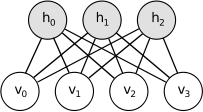

In [4]:
from IPython.display import Image
Image(filename='rbm_representation.png') 

The structure of RBMs makes the visible and hidden units independent from one another. As a result, we can have conditional probabilites. The probability of a specific hidden and visible unit is:

$Pr(h_{i} = 1|x)=\frac{exp(b_{i}+W_{i.}x)}{exp(b_{i}+W_{i.}x)+1} = σ(b_{i}+W_{i.}x)$

$Pr(x_{i} = 1|h)=\frac{exp(a_{i}+W_{.i}h)}{exp(a_{i}+W_{.i}h)+1} = σ(a_{i}+W_{.i}h)$

σ is the sigmoid function:

$σ(x)=\frac{e^x}{e^x+1}$

In order to make an energy based model we define free energy in the visible state as 

$F(x) = -log\sum_{h}^{} {exp(-E(x,h))}$

Which can be rewritten as

$=-a^Tx-\sum_{i}^{}log(1+exp(W_{i.}x+b_{i}))$

Which can be simplified to

$p(x;\theta)=\frac{1}{Z}exp(-F(x)) = \frac{exp(-F(x))}{\sum_{x}^{}exp(-F(\tilde{x}))}$

With a derivative of

$\frac{\partial F(x)}{\partial \theta}-\sum_{\tilde{x}∈N}^{}p(\tilde{x})\frac{\partial F(\tilde{x})}{\partial \theta}$

The x's are the current training data and $\tilde{x}$ are all possible outputs of visible units generated by the model. $\tilde{x}$ is nearly impossible to compute due to its exponential relationship to input size. The algorithim can work if N is a set of samples sampled from the model.

$\frac{\partial F(x)}{\partial \theta}-\frac{1}{|N|}\sum_{\tilde{x}∈N}^{}\frac{\partial F(\tilde{x})}{\partial \theta}$

### Sum Product Networks (SPN)

A SPN over variables $x_1,...,x_d$ is a roted directed acyclic graph. The leaves are indicators $x_1,...,x_d$ and $\bar x_1,...,\bar x_d$. The internal nodes of the tree are sums and products of the indicators. The values of the sum nodes and product nodes come from its children. An SPNs value comes from the value of its root. Below is a valid SPN. 

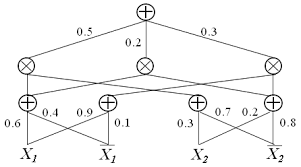

In [12]:
from IPython.display import Image
Image(filename='spn_representation.png') 

- A leaf n defines a tractable distribution over some RVs in X
- A nonnegative weight (Ex: 0.5 for the top left edge) is associated to each edge from a product node to a sum node.

An SPN is valid if it is complete and consistent. In order to achieve consistency, a product node's children can't be made up of one variable and negation. For Completion, sum node children must cover the same set of variables.

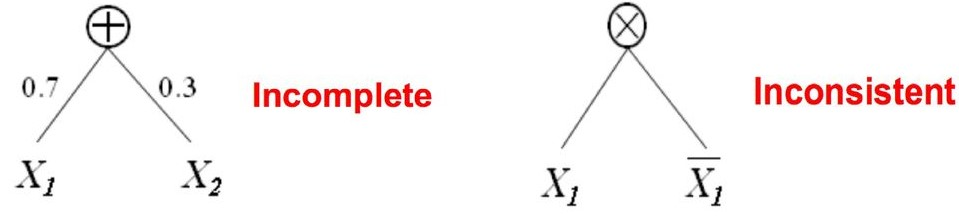

In [13]:
from IPython.display import Image
Image(filename='complete_consistent_spn.jpg') 

Complete evidence inference
- To compute p(X=x), S is evaluated bottom-up
- each node n, compute $S_n(x_{|sc(n)})=S_n(x)$

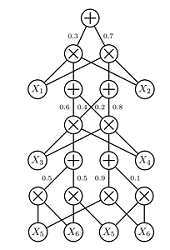

In [26]:
from IPython.display import Image
Image(filename='spn_inference1.png') 

- $S_n(x) = \phi _n(sc(n)=x_{|sc(n)})$ if n is a leaf node

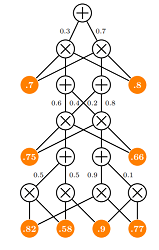

In [27]:
from IPython.display import Image
Image(filename='spn_inference2.png') 

- $S_n(x)= \prod_{c∈ch(n)}S_c(x)$ if n is a product node

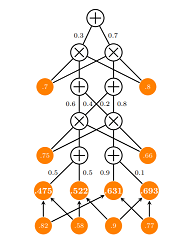

In [28]:
from IPython.display import Image
Image(filename='spn_inference3.png') 

- $S_n(x)=\sum_{c∈ch(n)}w_{nc}S_c(x)$ if n is a sum node

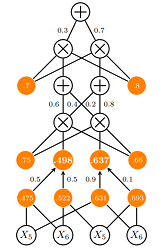

In [29]:
from IPython.display import Image
Image(filename='spn_inference4.png') 

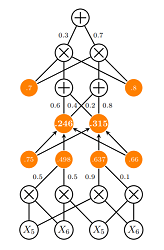

In [30]:
from IPython.display import Image
Image(filename='spn_inference5.png') 

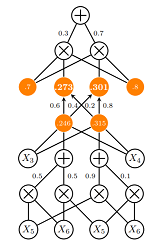

In [31]:
from IPython.display import Image
Image(filename='spn_inference6.png') 

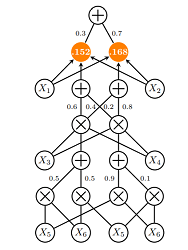

In [32]:
from IPython.display import Image
Image(filename='spn_inference7.png') 

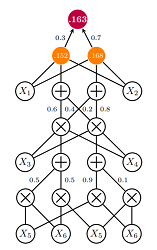

In [33]:
from IPython.display import Image
Image(filename='spn_inference8.png') 

the root output is <span style="color:#900C3F">S(x) = p(X = x)</span>

### Random Tensorized Sum-Product Networks (RAT-SPN)

RAT-SPNs are constructed using a region graph as the abstract representation of the network architecture. RAT-SPNs hvae only 2 partitions, which causes all product nodes to have 2 childen.

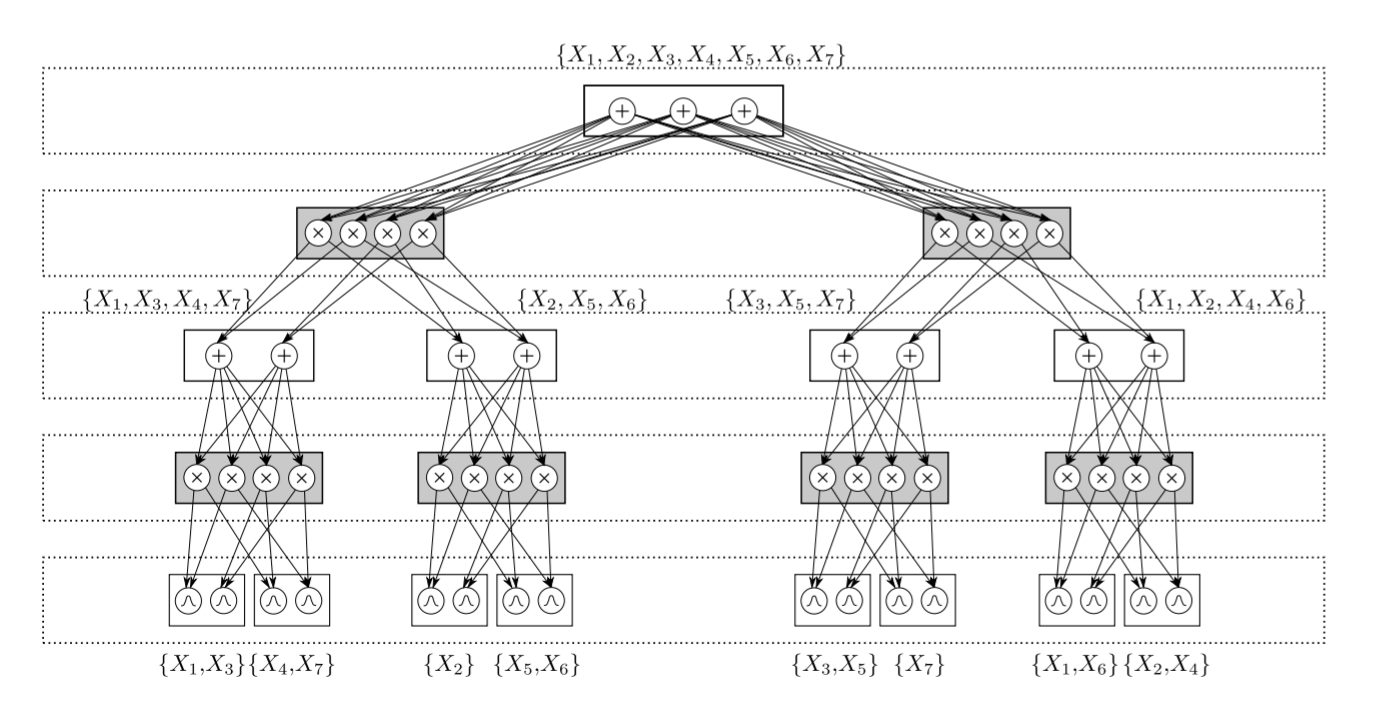

In [34]:
from IPython.display import Image
Image(filename='rat-spn_representation.png') 

## Algorithim

### RBM

### SPN

### RAT-SPN

## Experiment

### Data

The data used was from the MNIST and Fashion-MNIST data sets. The MNIST database is a set of 60,000 handwritten images. The size is normalized and centered to a 28x28 image. Fashion MNIST is also a set of 60,000 images; however, instead of numbers, the label is an article of clothing. These data sets are ideal for training and testing learning techniques and pattern recognition.

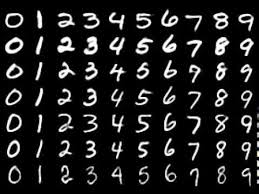

In [35]:
from IPython.display import Image
Image(filename='mnist_images.jpg') 

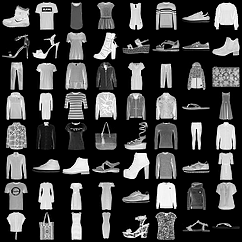

In [42]:
from IPython.display import Image
Image(filename='rbm-pytorch/output/real.png') 

### RBM

The RBM test used these variables: batch size = 64, number of epochs = 10, learning rate = 0.01, number of neurons in the hidden layer = 128, and an input size = 784. The performance of the model was calculated by loss (free energy - free energy of gibbs sample).

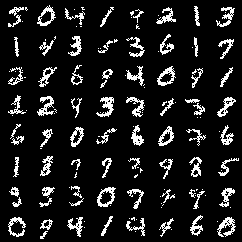

In [43]:
from IPython.display import Image
Image(filename='rbm-pytorch/output/fake_MNIST.png') 

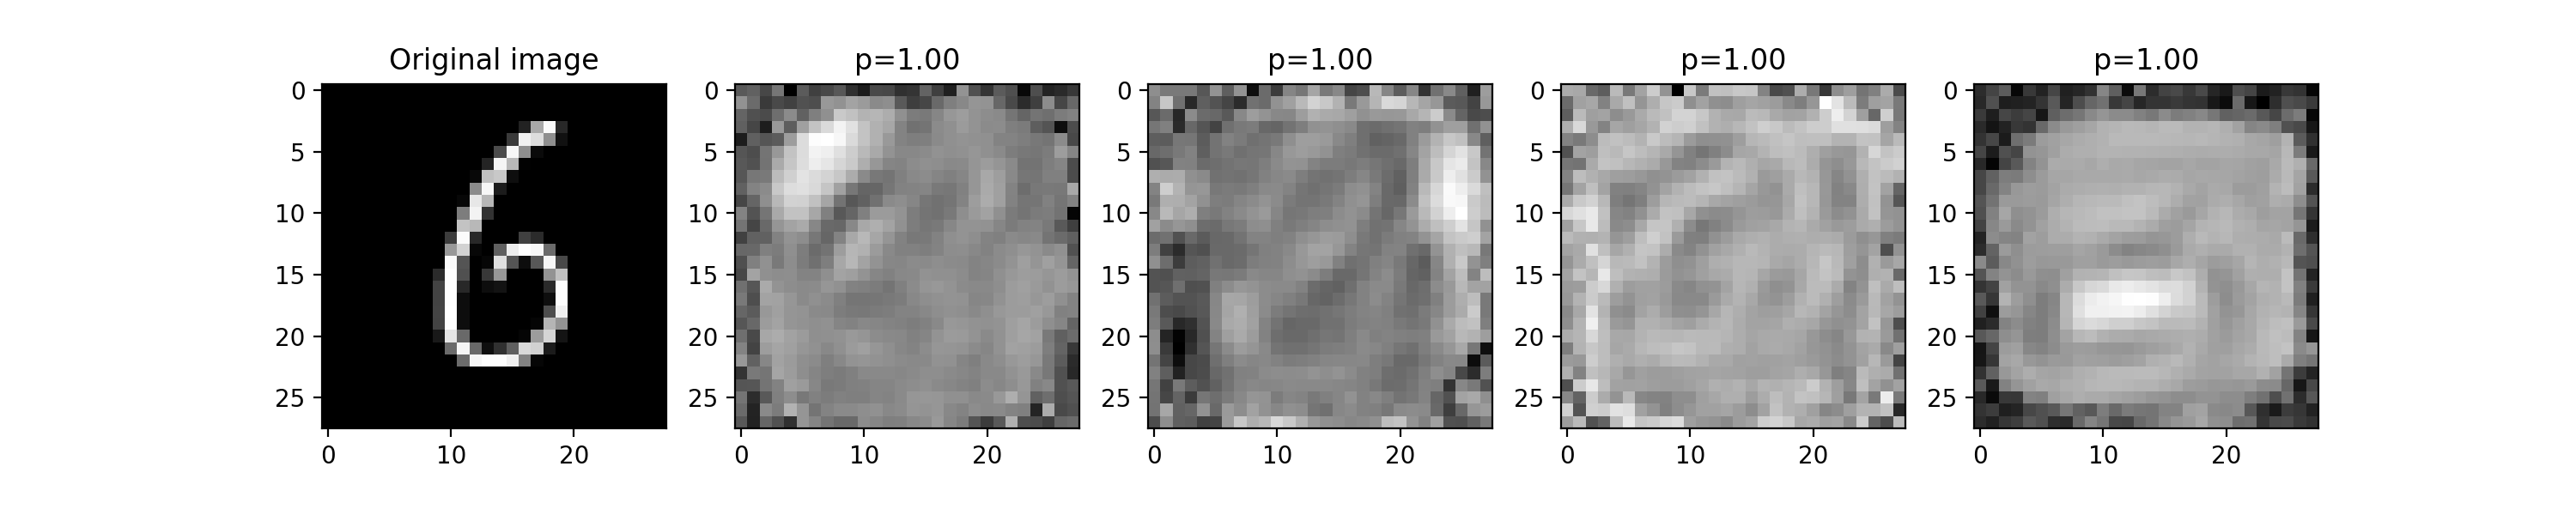

In [44]:
from IPython.display import Image
Image(filename='rbm-pytorch/output/factor_MNIST.png') 

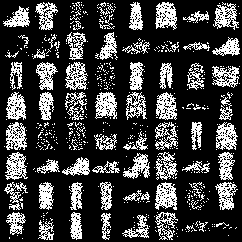

In [39]:
from IPython.display import Image
Image(filename='rbm-pytorch/output/fake.png') 

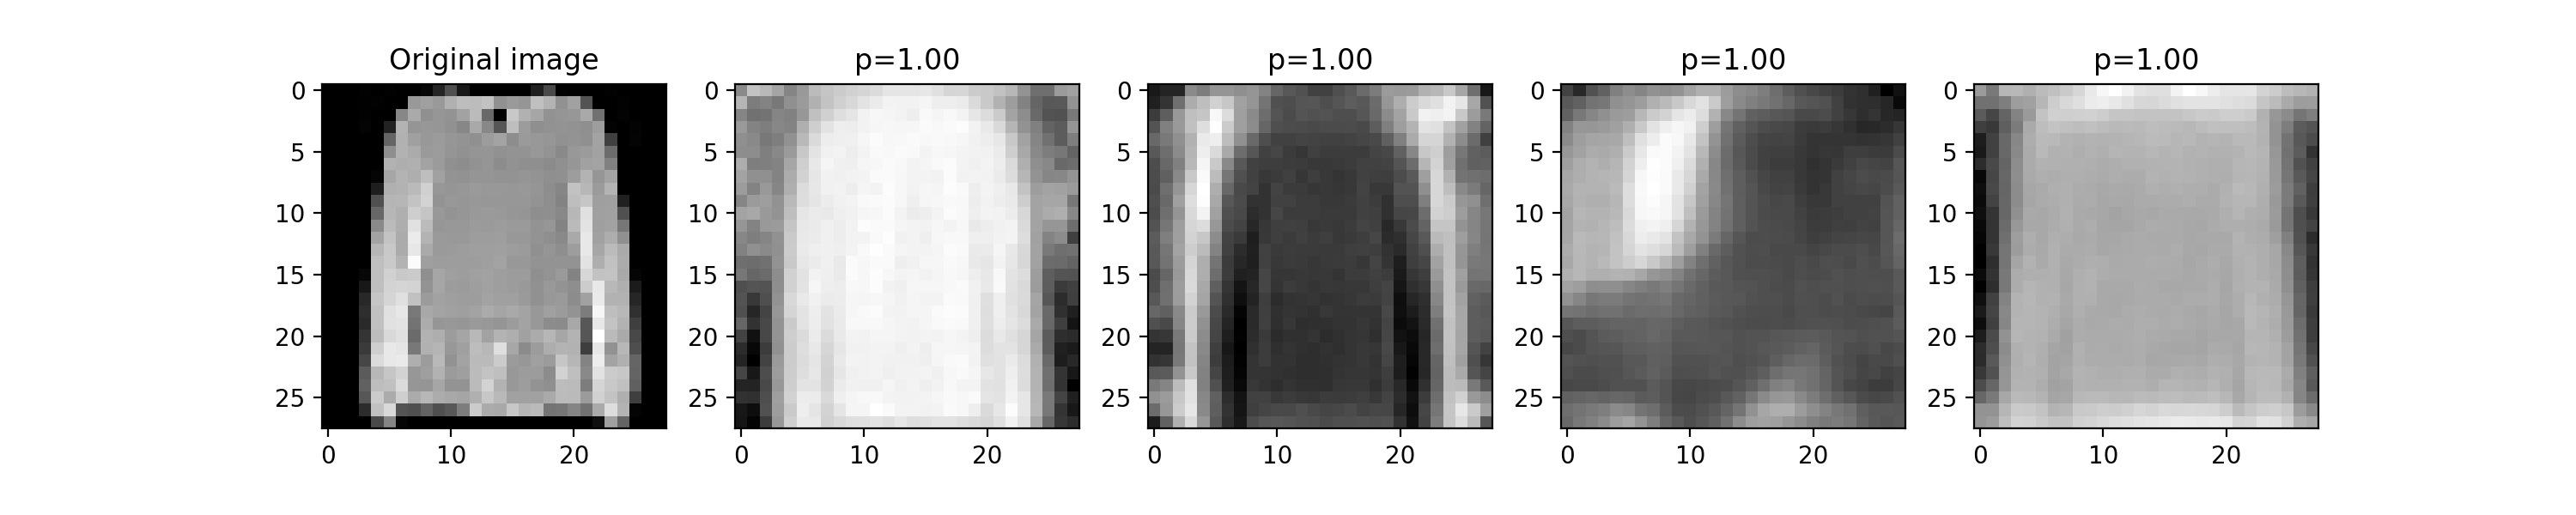

In [40]:
from IPython.display import Image
Image(filename='rbm-pytorch/output/factor.png') 

### SPN

The SPN model used is from the SPFlow library. Both MNIST and Fashion-MNIST datasets were binarized at 50 and parametric types were set to categorical. The SPN had 7860 edges, 3 layers, and 7861 nodes: 1 sum node, 10 product nodes, and 7850 leaf nodes. The SPN equation for MNIST is

and for Fashion MNIST

Ultimately the SPN on MNIST was 75.81% accurate and on Fashion MNIST was 68.28% accurate. These numbers were much lower than expected.

### RAT-SPN

RAT-SPN was used because of SPFlow's surprisingly low accuracy. A few different variables were used and results were limited due to hardware restrictions and time-out errors. The following structures were used

with a dropout rate input of 0.5 and dropout rate sums of 0.5. The models were supposed to be trained over 100 epochs, but none of the experiments were able to reach the goal due to time-out. 

The results for MNIST were

Fashion-MNIST results:

One last test was used to determine how well the model dealt with missing data. The test data used was missing an 8x8 block of pixels randomized from one corner to another of the MNIST digits images. The results are as follows

## Conclusions and Future Work

Our initial goal for the project was to compare Restricted Boltzmann Machines with Sum Product Networks. The RBM results were in line with what was expected. However, SPFlow's SPN provided more to be desired results. After using RAT-SPN, our results were very impressive. RAT-SPN worked incredibly well even with a missing 8x8 block of pixels. In the future, we would like to test the learning methods on different data sets.